In [1]:
data display;
input cases height width trash;
datalines;
  47  1  1  1
  43  1  1  2
  46  1  2  1
  40  1  2  2
  62  2  1  1
  68  2  1  2
  67  2  2  1
  71  2  2  2
  41  3  1  1
  39  3  1  2
  42  3  2  1
  46  3  2  2
;
run;

SAS Connection established. Subprocess id is 2407




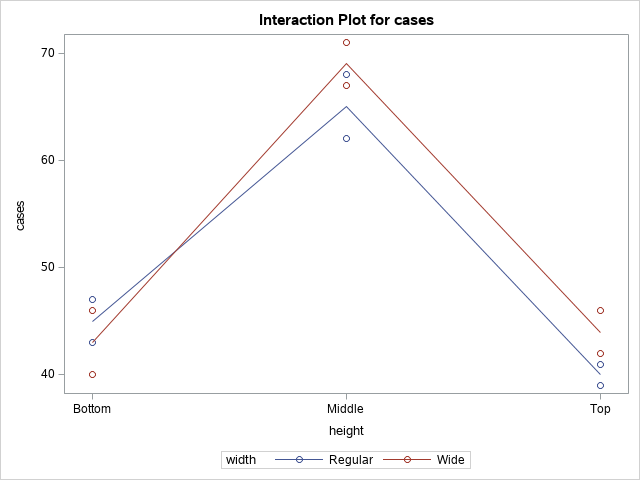
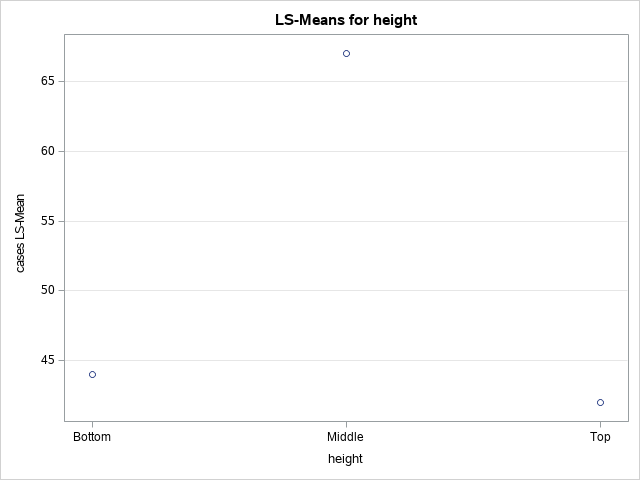
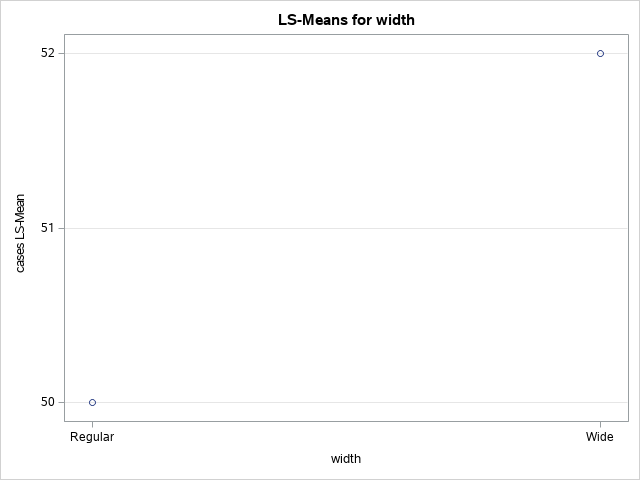
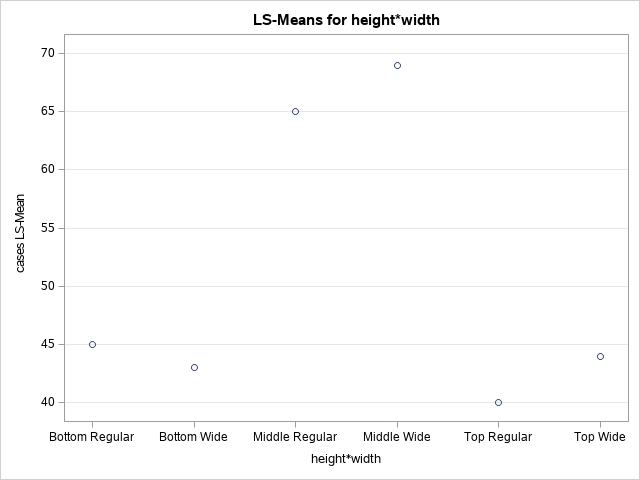

In [4]:
PROC FORMAT;
  VALUE  forheight 1="Bottom"
                2="Middle"
                                3="Top";
  Value forwidth 1="Regular"
                                        2="Wide";
run;

/*************************************************************
******** Look at the interaction model **********************/
proc glm data=display;
format height forheight. width forwidth.;
class height width;
model cases =  height width height*width ;
lsmeans height width height*width / stderr;
ods output LSMeans=LSMeans;
run;

In [7]:
data dataplot;
set LSMeans;
if Effect='height_width';
h = 0;
if height='Middle' then h=1;
if height='Top' then h=2;
w = 0;
if width ='Wide' then w=1;
run;

proc sgplot data=dataplot;
scatter x=LSMean y=h  ;
scatter x=LSMean y=w ;
run;


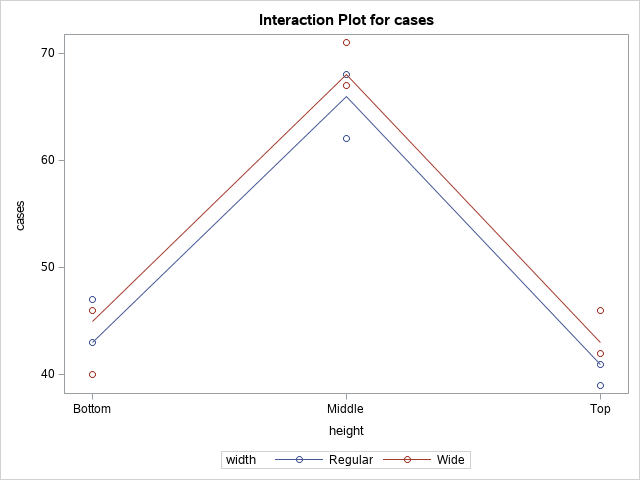
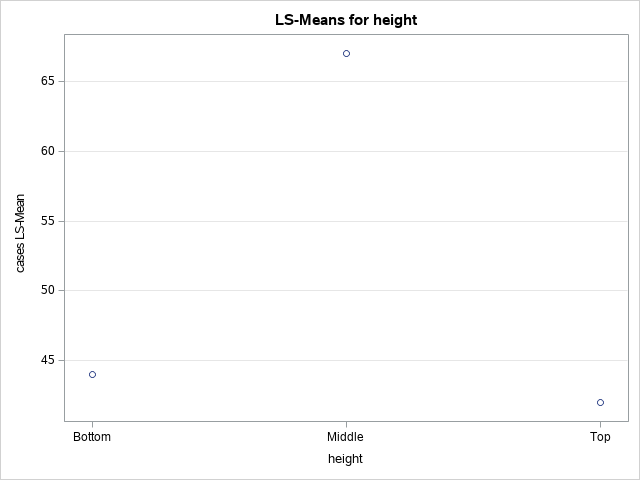
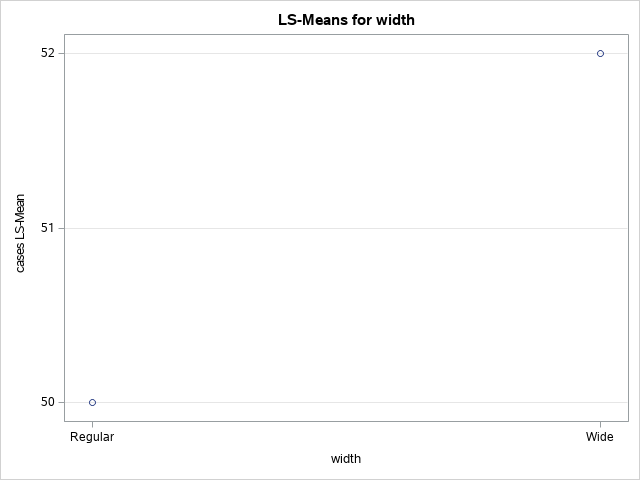
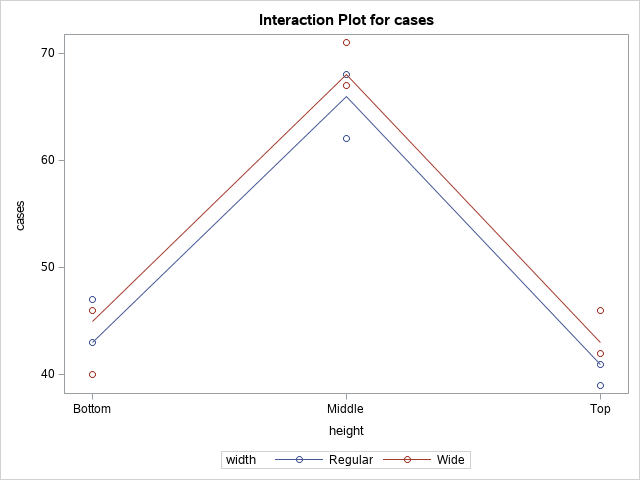
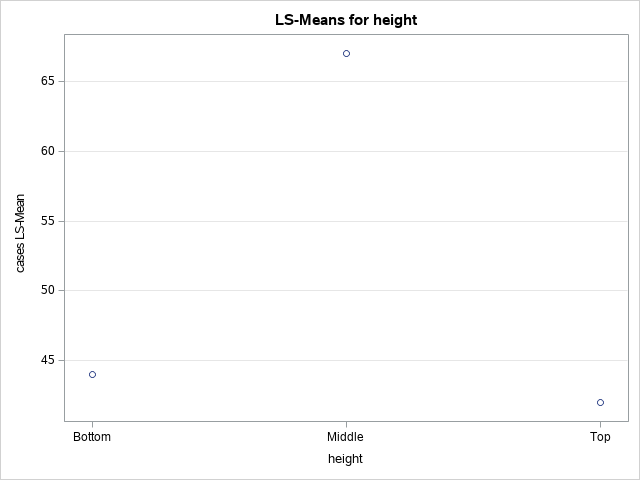
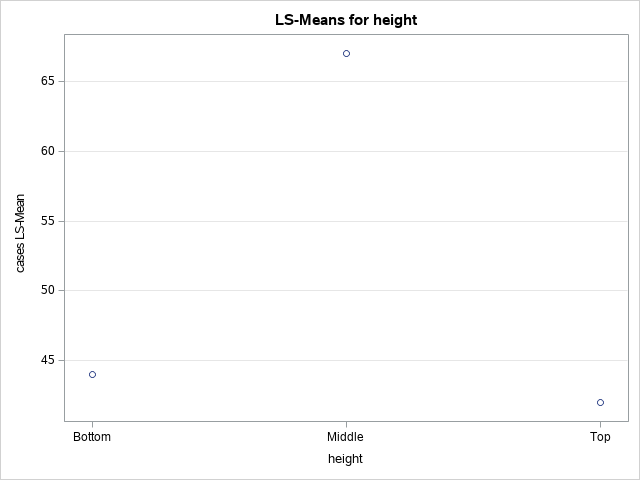
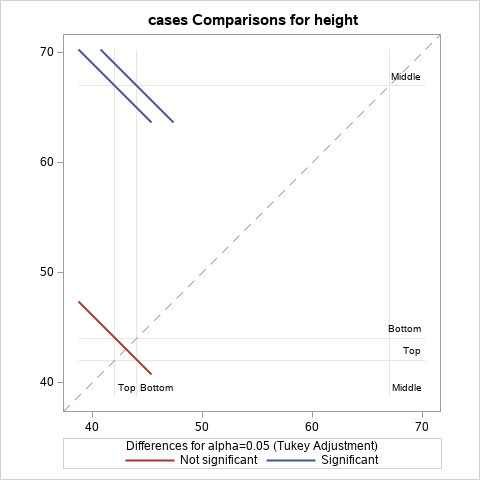
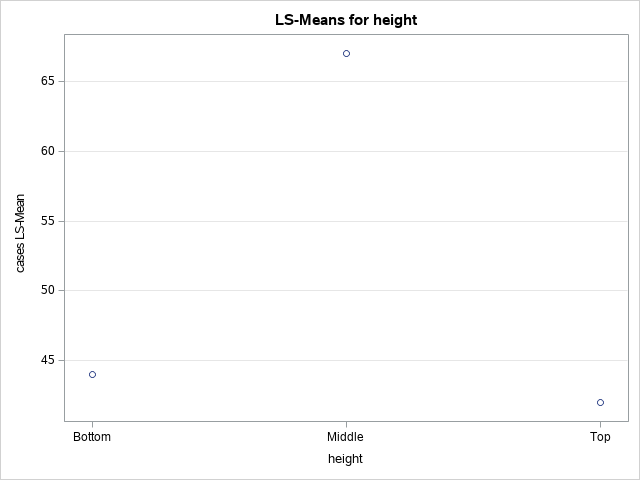
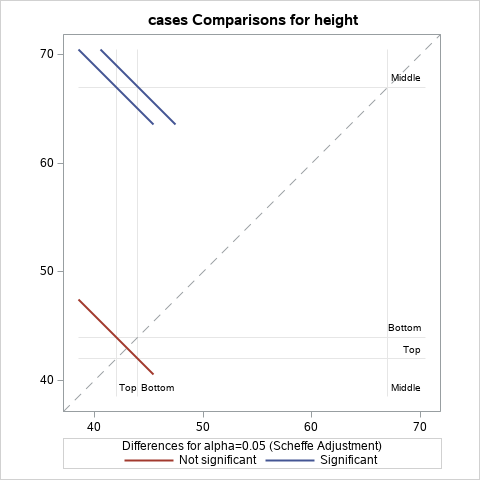
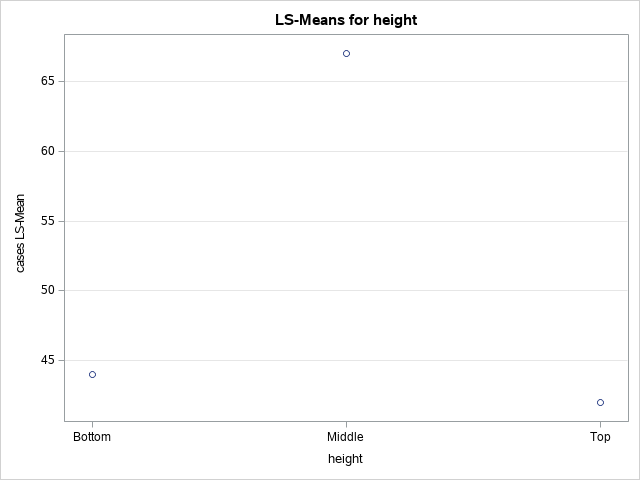
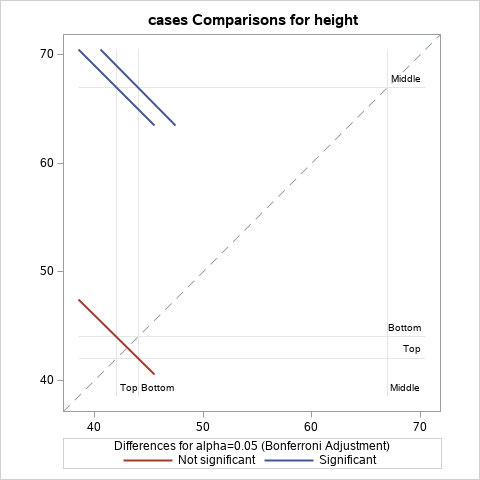

In [8]:
/*************************************************************
****************  The additive model *************************/
proc glm data=display;
format height forheight. width forwidth.;
class height width;
model cases =  height width ;
lsmeans height width/ cl stderr;
run; quit;


/*************************************************************************
******** Pairwise comparisions in an additive model for one factor ******/
proc glm data=display;
format height forheight. width forwidth.;
class height width;
model cases =  height width;
lsmeans height /cl;
lsmeans height/  cl adjust = tukey;
lsmeans height / cl adjust=scheffe;
lsmeans height / cl adjust=bon;
run; quit;


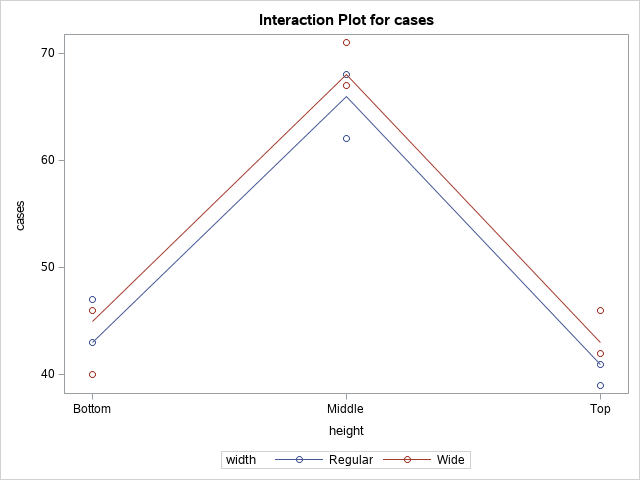
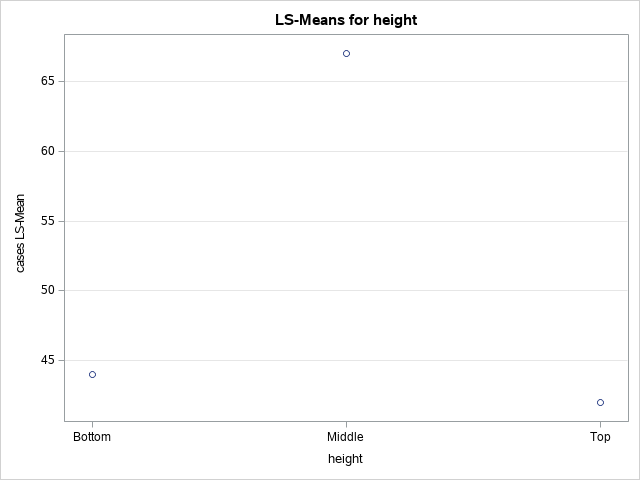
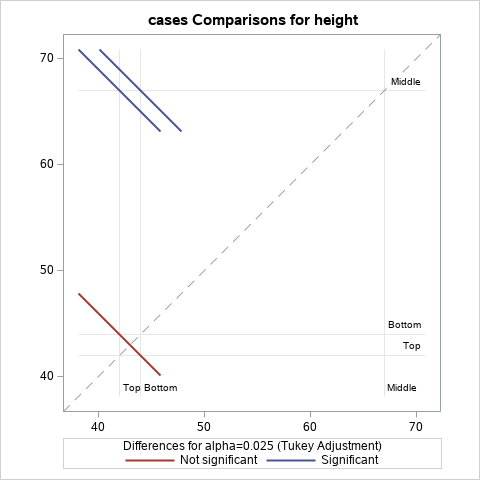
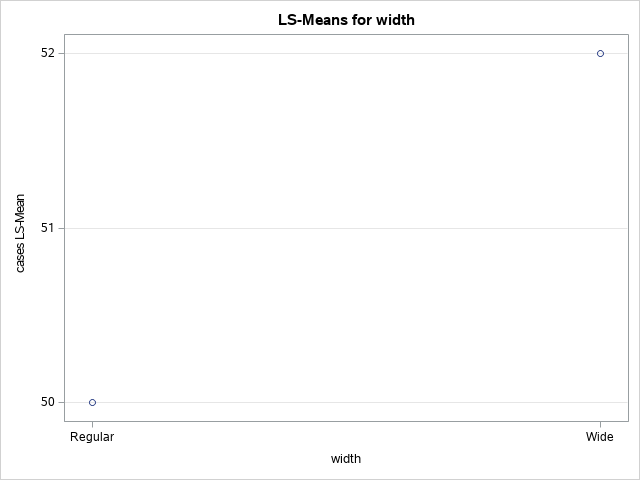
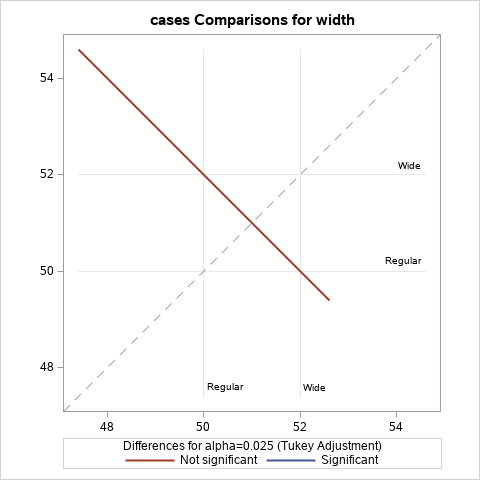

In [9]:
/********************************************************************
******** Pairwise comparisions in an additive model for two factors */
proc glm data=display;
format height forheight. width forwidth.;
class height width;
model cases =  height width  ;
lsmeans height/ adjust = tukey alpha=.025 cl;
lsmeans width / adjust = tukey alpha=.025 cl;
run; quit;

In [10]:
data Hay;
input hours A B;
datalines;
    2.4      1      1      1
    2.7      1      1      2
    2.3      1      1      3
    2.5      1      1      4
    4.6      1      2      1
    4.2      1      2      2
    4.9      1      2      3
    4.7      1      2      4
    4.8      1      3      1
    4.5      1      3      2
    4.4      1      3      3
    4.6      1      3      4
    5.8      2      1      1
    5.2      2      1      2
    5.5      2      1      3
    5.3      2      1      4
    8.9      2      2      1
    9.1      2      2      2
    8.7      2      2      3
    9.0      2      2      4
    9.1      2      3      1
    9.3      2      3      2
    8.7      2      3      3
    9.4      2      3      4
    6.1      3      1      1
    5.7      3      1      2
    5.9      3      1      3
    6.2      3      1      4
    9.9      3      2      1
   10.5      3      2      2
   10.6      3      2      3
   10.1      3      2      4
   13.5      3      3      1
   13.0      3      3      2
   13.3      3      3      3
   13.2      3      3      4
   ;
   run;


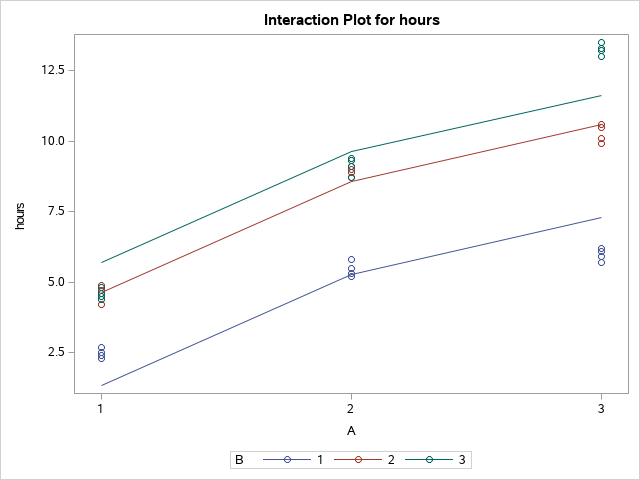

In [14]:
proc glm  data=hay;
class A B;
model hours = A B;
run;



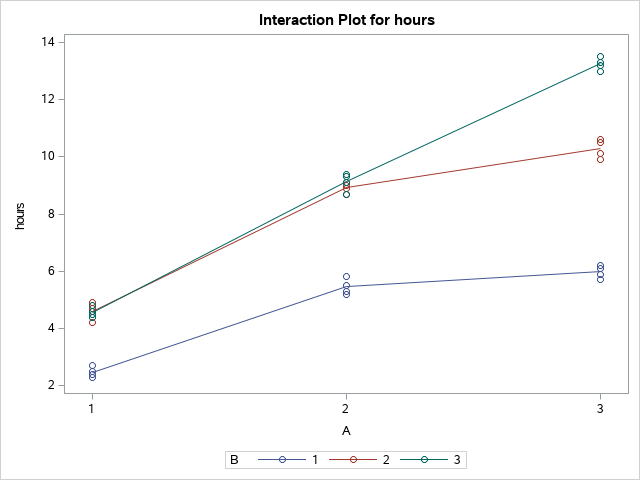

In [15]:
proc glm data=hay;
class A B;
model hours = A | B;
run;